# Image Compression using SVD

Libraries: Numpy, Matplot, Scipy and for image processing, PIL

(Sample Image provided)


Images are represented in a rectangular array where each element corresponds to the grayscale value for that pixel. For colored images we have a 3-dimensional array of size m * n * 3, where m,n represents the number of pixels horizontally and vertically, respectively, and for each pixel the intensity of the primary color Red, Green and Blue are stored.

Image compression using SVD makes use of the detail that very few of the singular values are large. Although images from the real world are of full rank but their effective rank is low which means only a few of the singular values of the SVD of images will be large.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd
from PIL import Image

We load the image to be compressed. In this example we use one color image.

In [2]:
# Set Image to compress
ImagePath = 'horses.jpg'
ImagePath_GS = 'horses_greyscale.jpg'
dpi = 80
width = 800
height = 800

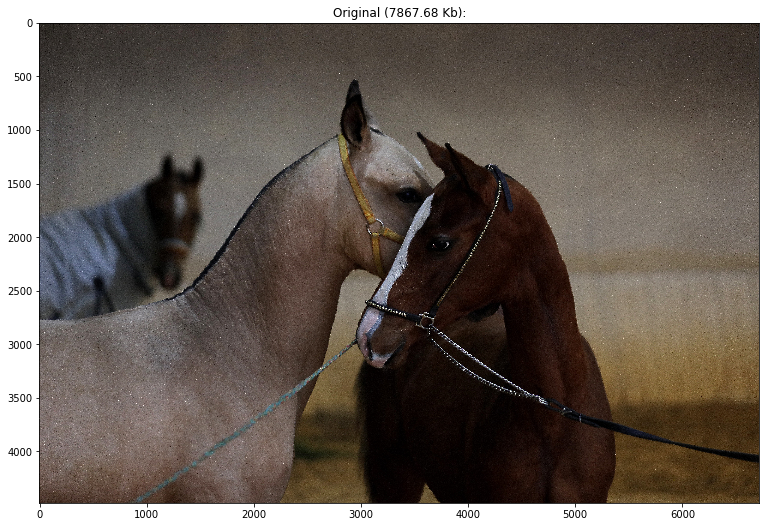

In [3]:
# Display original image size and image
size = float(os.path.getsize(ImagePath))/1000
title = "Original (%0.2f Kb):" %size
img = Image.open(ImagePath) 

# Size the figure needs to be in inches to fit the image
figsize = width / float(dpi), height / float(dpi)

# Create a figure of the right size with one axes that takes up the full figure
fig = plt.figure(figsize=figsize)
ax = fig.add_axes([0, 0, 1, 1])

# Display the image.
ax.imshow(img)
plt.title(title)
plt.show()

Then we convert it to greyscale and then obtain the 2D matrix.

<Figure size 432x288 with 0 Axes>

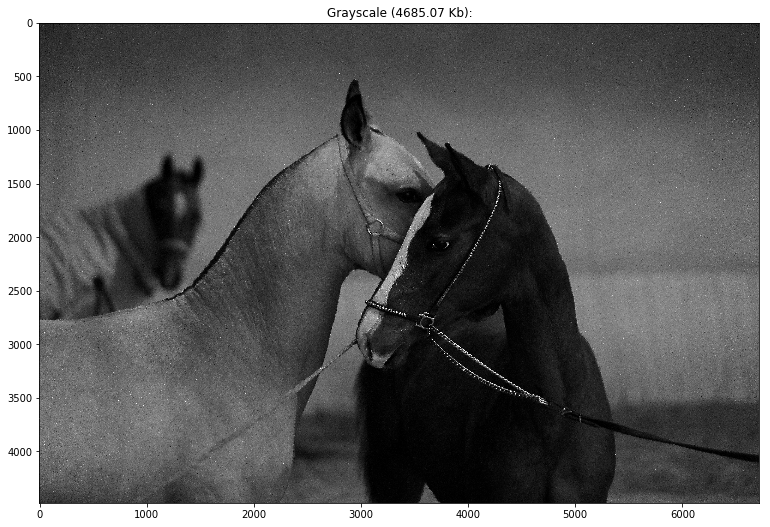

In [4]:
# Compression of gray scale images

# Convert to grayscale
img_gray = img.convert('L')
imat = np.array( list(img_gray.getdata(band = 0)), float)
imat.shape = (img_gray.size[1], img_gray.size[0])
imat = np.matrix(imat)

# Display Greyscale image size and image
plt.figure()
GetImage = Image.fromarray((imat ).astype(np.uint8))
GetImage.save(ImagePath_GS)
size = float(os.path.getsize(ImagePath_GS))/1000
title = "Grayscale (%0.2f Kb):" %size


# What size does the figure need to be in inches to fit the image?
figsize = width / float(dpi), height / float(dpi)

# Create a figure of the right size with one axes that takes up the full figure
fig = plt.figure(figsize=figsize)
ax = fig.add_axes([0, 0, 1, 1])

# Display the image.
ax.imshow(imat, cmap = 'gray')
plt.title(title)
plt.show()

In [5]:
# Grayscale
# Compression of images for various values of k
def CalculateCompressionRatio_GS(k):
    Compressed_Bytes = 0
    m = float(imat.shape[0]) 
    n = float(imat.shape[1])
    Compressed_Bytes = k * (m + n + 1)
    ratio = (m * n)/Compressed_Bytes
    return  ratio

We use numpy.linalg library's svd function to compute svd of a matrix. This svd function returns U,s,Vt 

U has left singular vectors in the columns
s is rank 1 numpy array with singular values
Vt (V Transpose) has right singular vectors in the rows 

In [6]:
# Perform single value decomposition (Greyscale)
U, S, Vt = svd(imat, full_matrices=True) 

For various values of k, we use numpy array slicing to select k singular vectors and values. The reconstructed approximation of the original matrix is done using a subset of singular vectors.

GS Compression Ratio: 537.5520042853317  k =  5
GS Compression Ratio: 268.77600214266585  k =  10
GS Compression Ratio: 179.18400142844388  k =  15
GS Compression Ratio: 134.38800107133292  k =  20
GS Compression Ratio: 89.59200071422194  k =  30
GS Compression Ratio: 76.79314346933309  k =  35
GS Compression Ratio: 59.72800047614796  k =  45
GS Compression Ratio: 53.755200428533165  k =  50
GS Compression Ratio: 35.83680028568878  k =  75
GS Compression Ratio: 29.86400023807398  k =  90


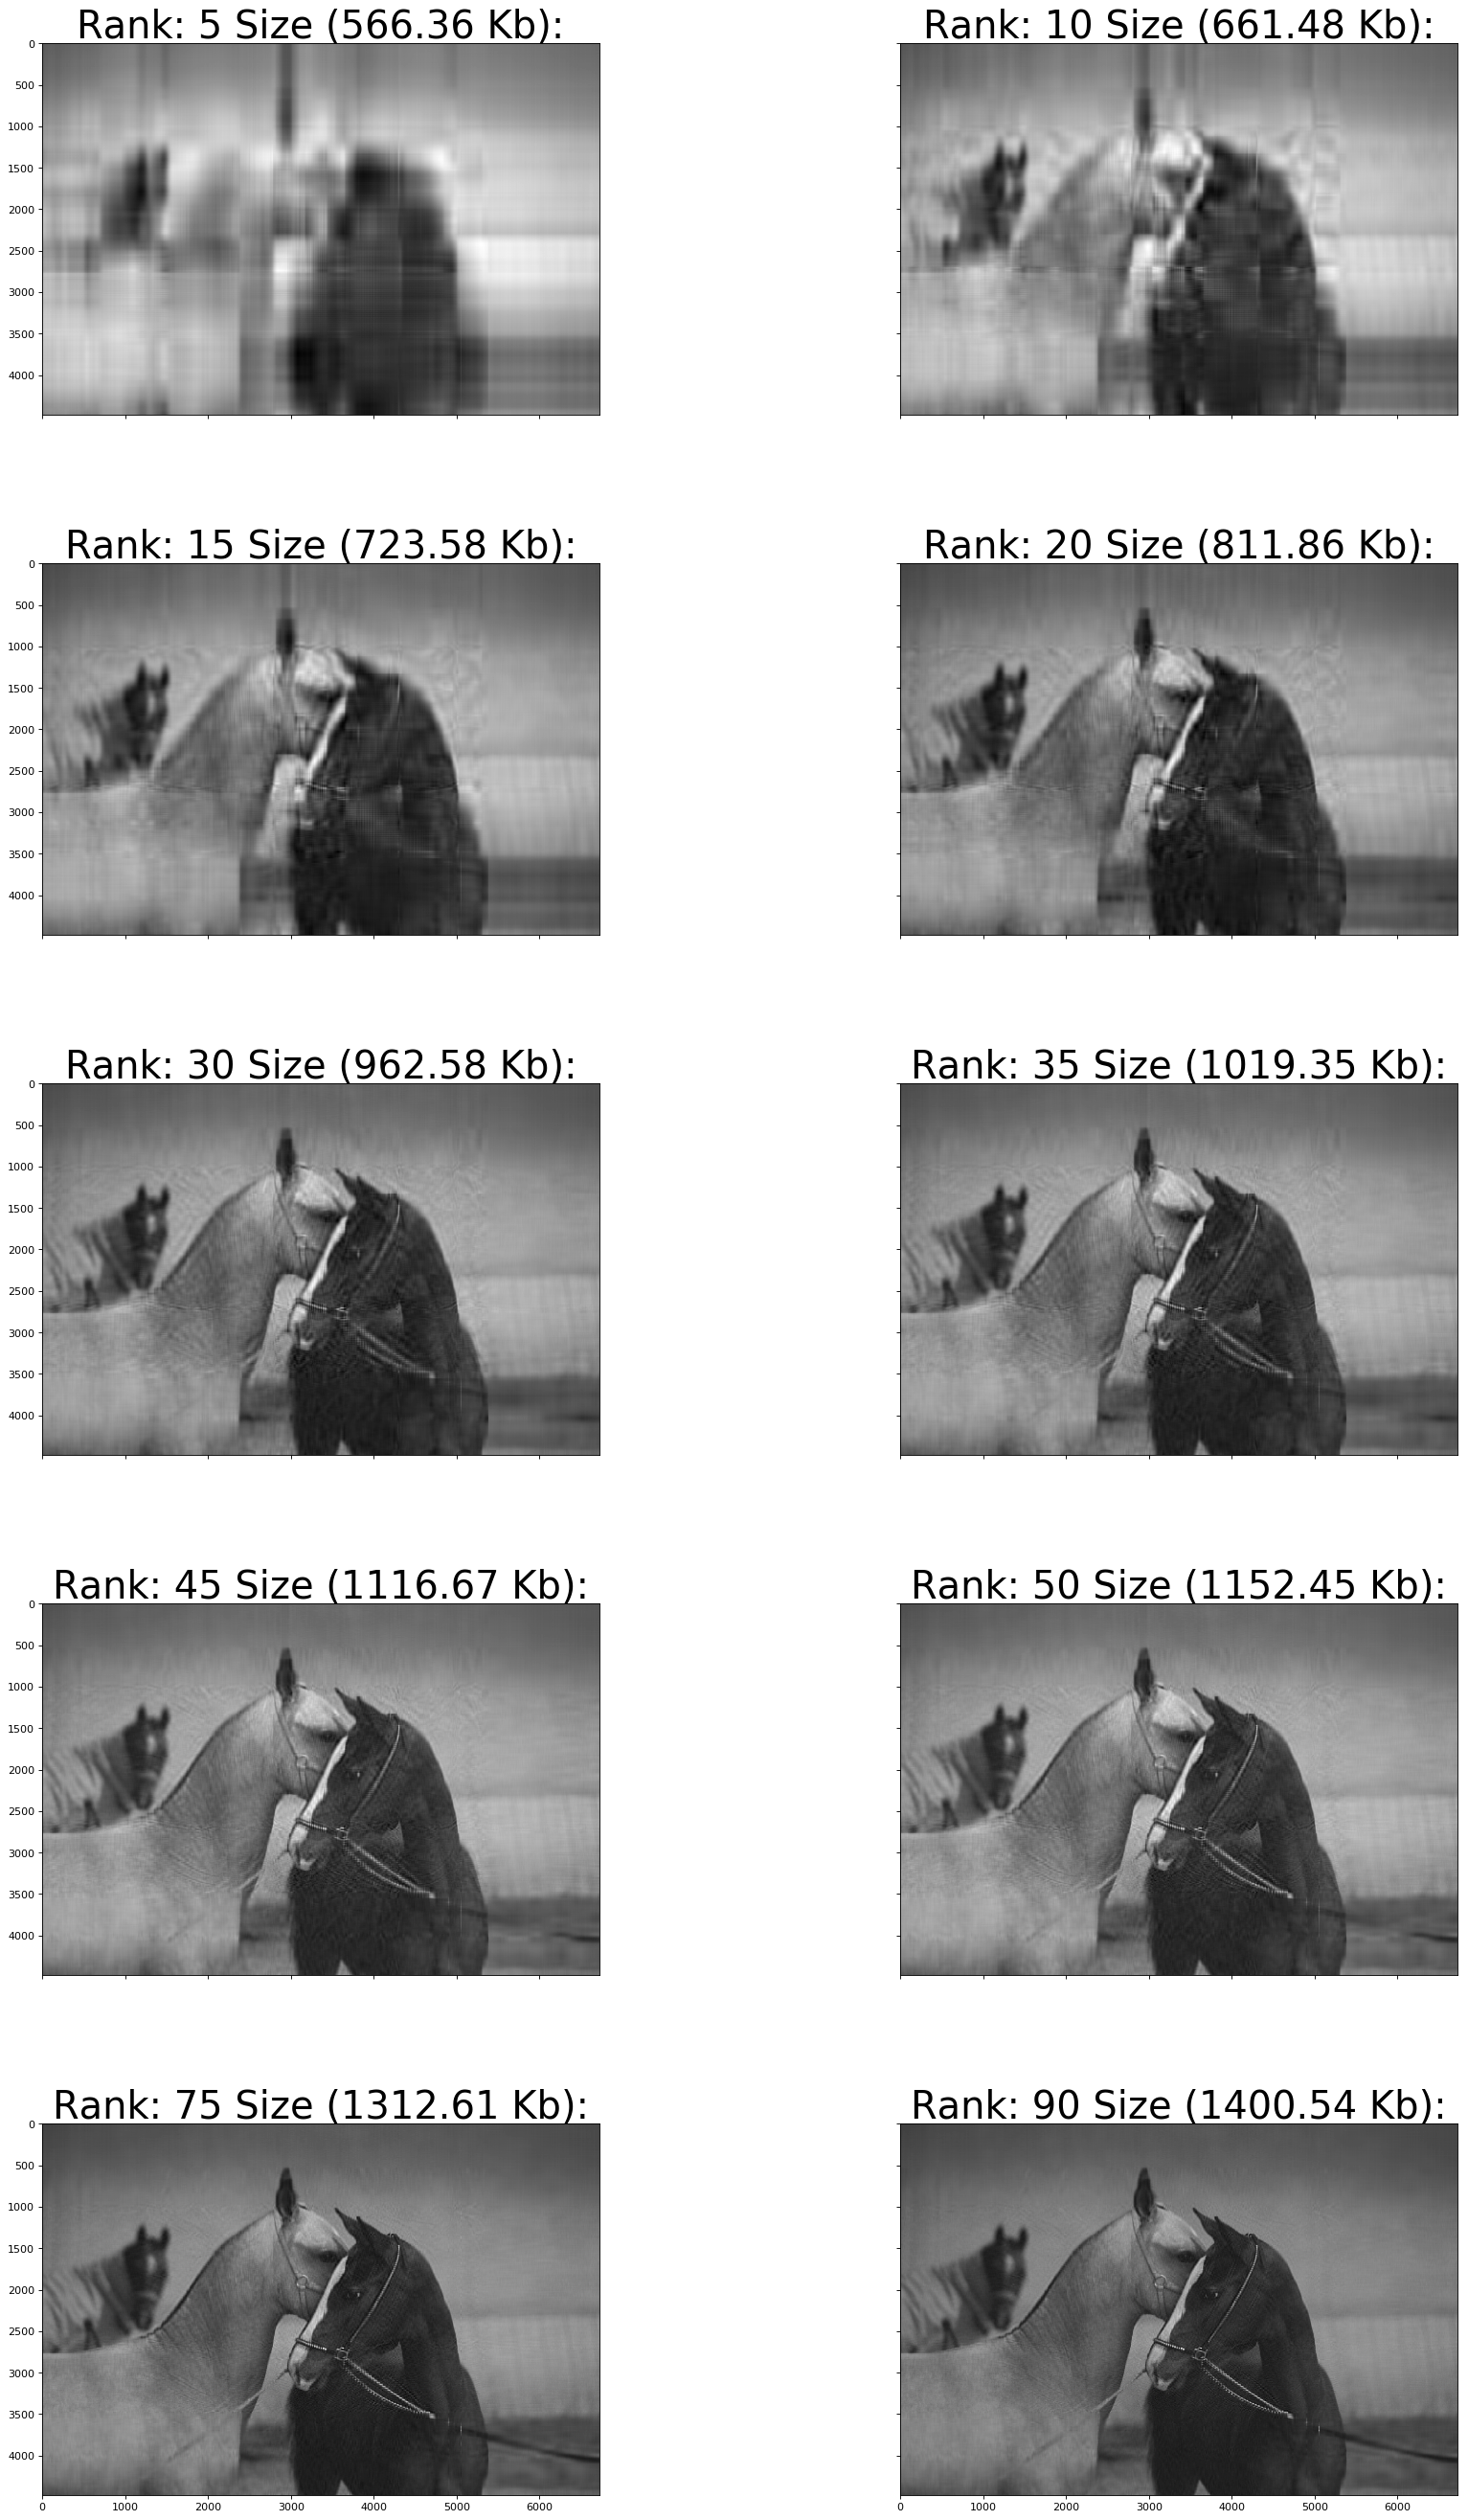

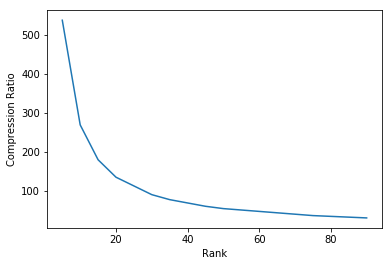

In [7]:
# Try different k values to see what kind of compression and quality of image is seen

kvalues = [5,10,15,20,30, 35, 45, 50,75,90]
CR2 = []

i = 0
figsize = width / float(dpi), height / float(dpi)
nrows, ncols = 5, 2  # array of sub-plots based on number of kvalues

fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(64,64), dpi=80, sharex=True, sharey=True)
fig.subplots_adjust(left=0.35, bottom=0.25, right=0.65, top=0.75, wspace=0.4, hspace=0.4)


for k in kvalues:
    
    Recon = np.matrix(U[:, :k]) * np.diag(S[:k]) * np.matrix(Vt[:k,:])
    
    #Size
    ImagePath_GS = 'greyscale' + str(k) + '.jpg'
    GetImage = Image.fromarray((Recon ).astype(np.uint8))
    GetImage.save(ImagePath_GS)
    size = float(os.path.getsize(ImagePath_GS))/1000
    
    #Ratio
    ratio = float(CalculateCompressionRatio_GS(k))
    print("GS Compression Ratio:",ratio, " k = ",k)
    CR2.append(ratio)
    
    #Plotting
    fig.axes[i].set_title("Rank: " + str(k) + " Size (%0.2f Kb):" %size, size=36 )
    fig.axes[i].imshow(Recon, cmap='gray')
    i += 1
      
#Display k images  
plt.show()

# Plot Compression ratio obtined for greyscale images for various values of k    
plt.figure()
plt.plot(kvalues,CR2)
plt.title("")
plt.xlabel('Rank')
plt.ylabel('Compression Ratio')
plt.show()

Color images are represented in python as 3-D numpy arrays — the third dimension is to represent the color values (red (0),green(1) or blue(2)). In this case We have normalized the intensity values in each pixel, that’s why we have divided the values by 255.

In [8]:
# Try compression on color image
# Get Image and Size

image_c = np.array(Image.open(ImagePath) )
original_bytes = image_c.nbytes

image_c = image_c/255
row,col,_ = image_c.shape

print("Rows:", row,"Columns: ",col, "Original size(Bytes): ",original_bytes)


Rows: 4480 Columns:  6720 Original size(Bytes):  90316800


To use SVD, we convert the 3-D array into 2-D arrays and then reconstruct it back.

In [9]:
# Split into three channels for each of the primary colors
imat_red = image_c[:, :, 0]
imat_green = image_c[:, :, 1]
imat_blue = image_c[:, :, 2]

Now we work with 3 independent 2-D matrices, and perform an SVD-decomposition for each color separately. This svd function returns U_r, s_r, Vt_r for Red,  U_g, s_g, Vt_g for green and U_b, s_b, Vt_b for Blue.

In [10]:
# Perform SVD on each of the matrices
U_r, s_r, Vt_r = svd(imat_red, full_matrices=True)
U_g, s_g, Vt_g = svd(imat_green, full_matrices=True)
U_b, s_b, Vt_b = svd(imat_blue, full_matrices=True)

In [11]:
# Color
# Compression of images for various values of k
def CalculateCompressionRatio_color(k):
    compressed_bytes = sum([matrix.nbytes for matrix in 
                        [U_r[:, 0:k] , s_r[0:k], Vt_r[0:k, :], U_g[:, 0:k] , s_g[0:k], Vt_g[0:k, :], U_b[:, 0:k] , s_b[0:k], Vt_b[0:k, :]]])
    ratio =   original_bytes/compressed_bytes
    return  ratio

The color image can be considered as a stack of 3 seperate 2-D images and We apply the truncated svd reconstruction on each two dimensional layer seperately. For various values of k, we use numpy array slicing to select k singular vectors and values. The reconstructed approximation of the original matrix is done using a subset of singular vectors.

Now we construct the approximate matrices for each color and merge them together. We check and correct those pixels values that have intensity value  outside of the range 0 and 1.

Color Compression Ratio: 67.19400053566646  k =  5
Color Compression Ratio: 33.59700026783323  k =  10
Color Compression Ratio: 22.398000178555485  k =  15
Color Compression Ratio: 13.438800107133291  k =  25
Color Compression Ratio: 9.599142933666636  k =  35
Color Compression Ratio: 7.466000059518495  k =  45
Color Compression Ratio: 6.719400053566646  k =  50
Color Compression Ratio: 4.479600035711098  k =  75
Color Compression Ratio: 3.359700026783323  k =  100
Color Compression Ratio: 2.239800017855549  k =  150


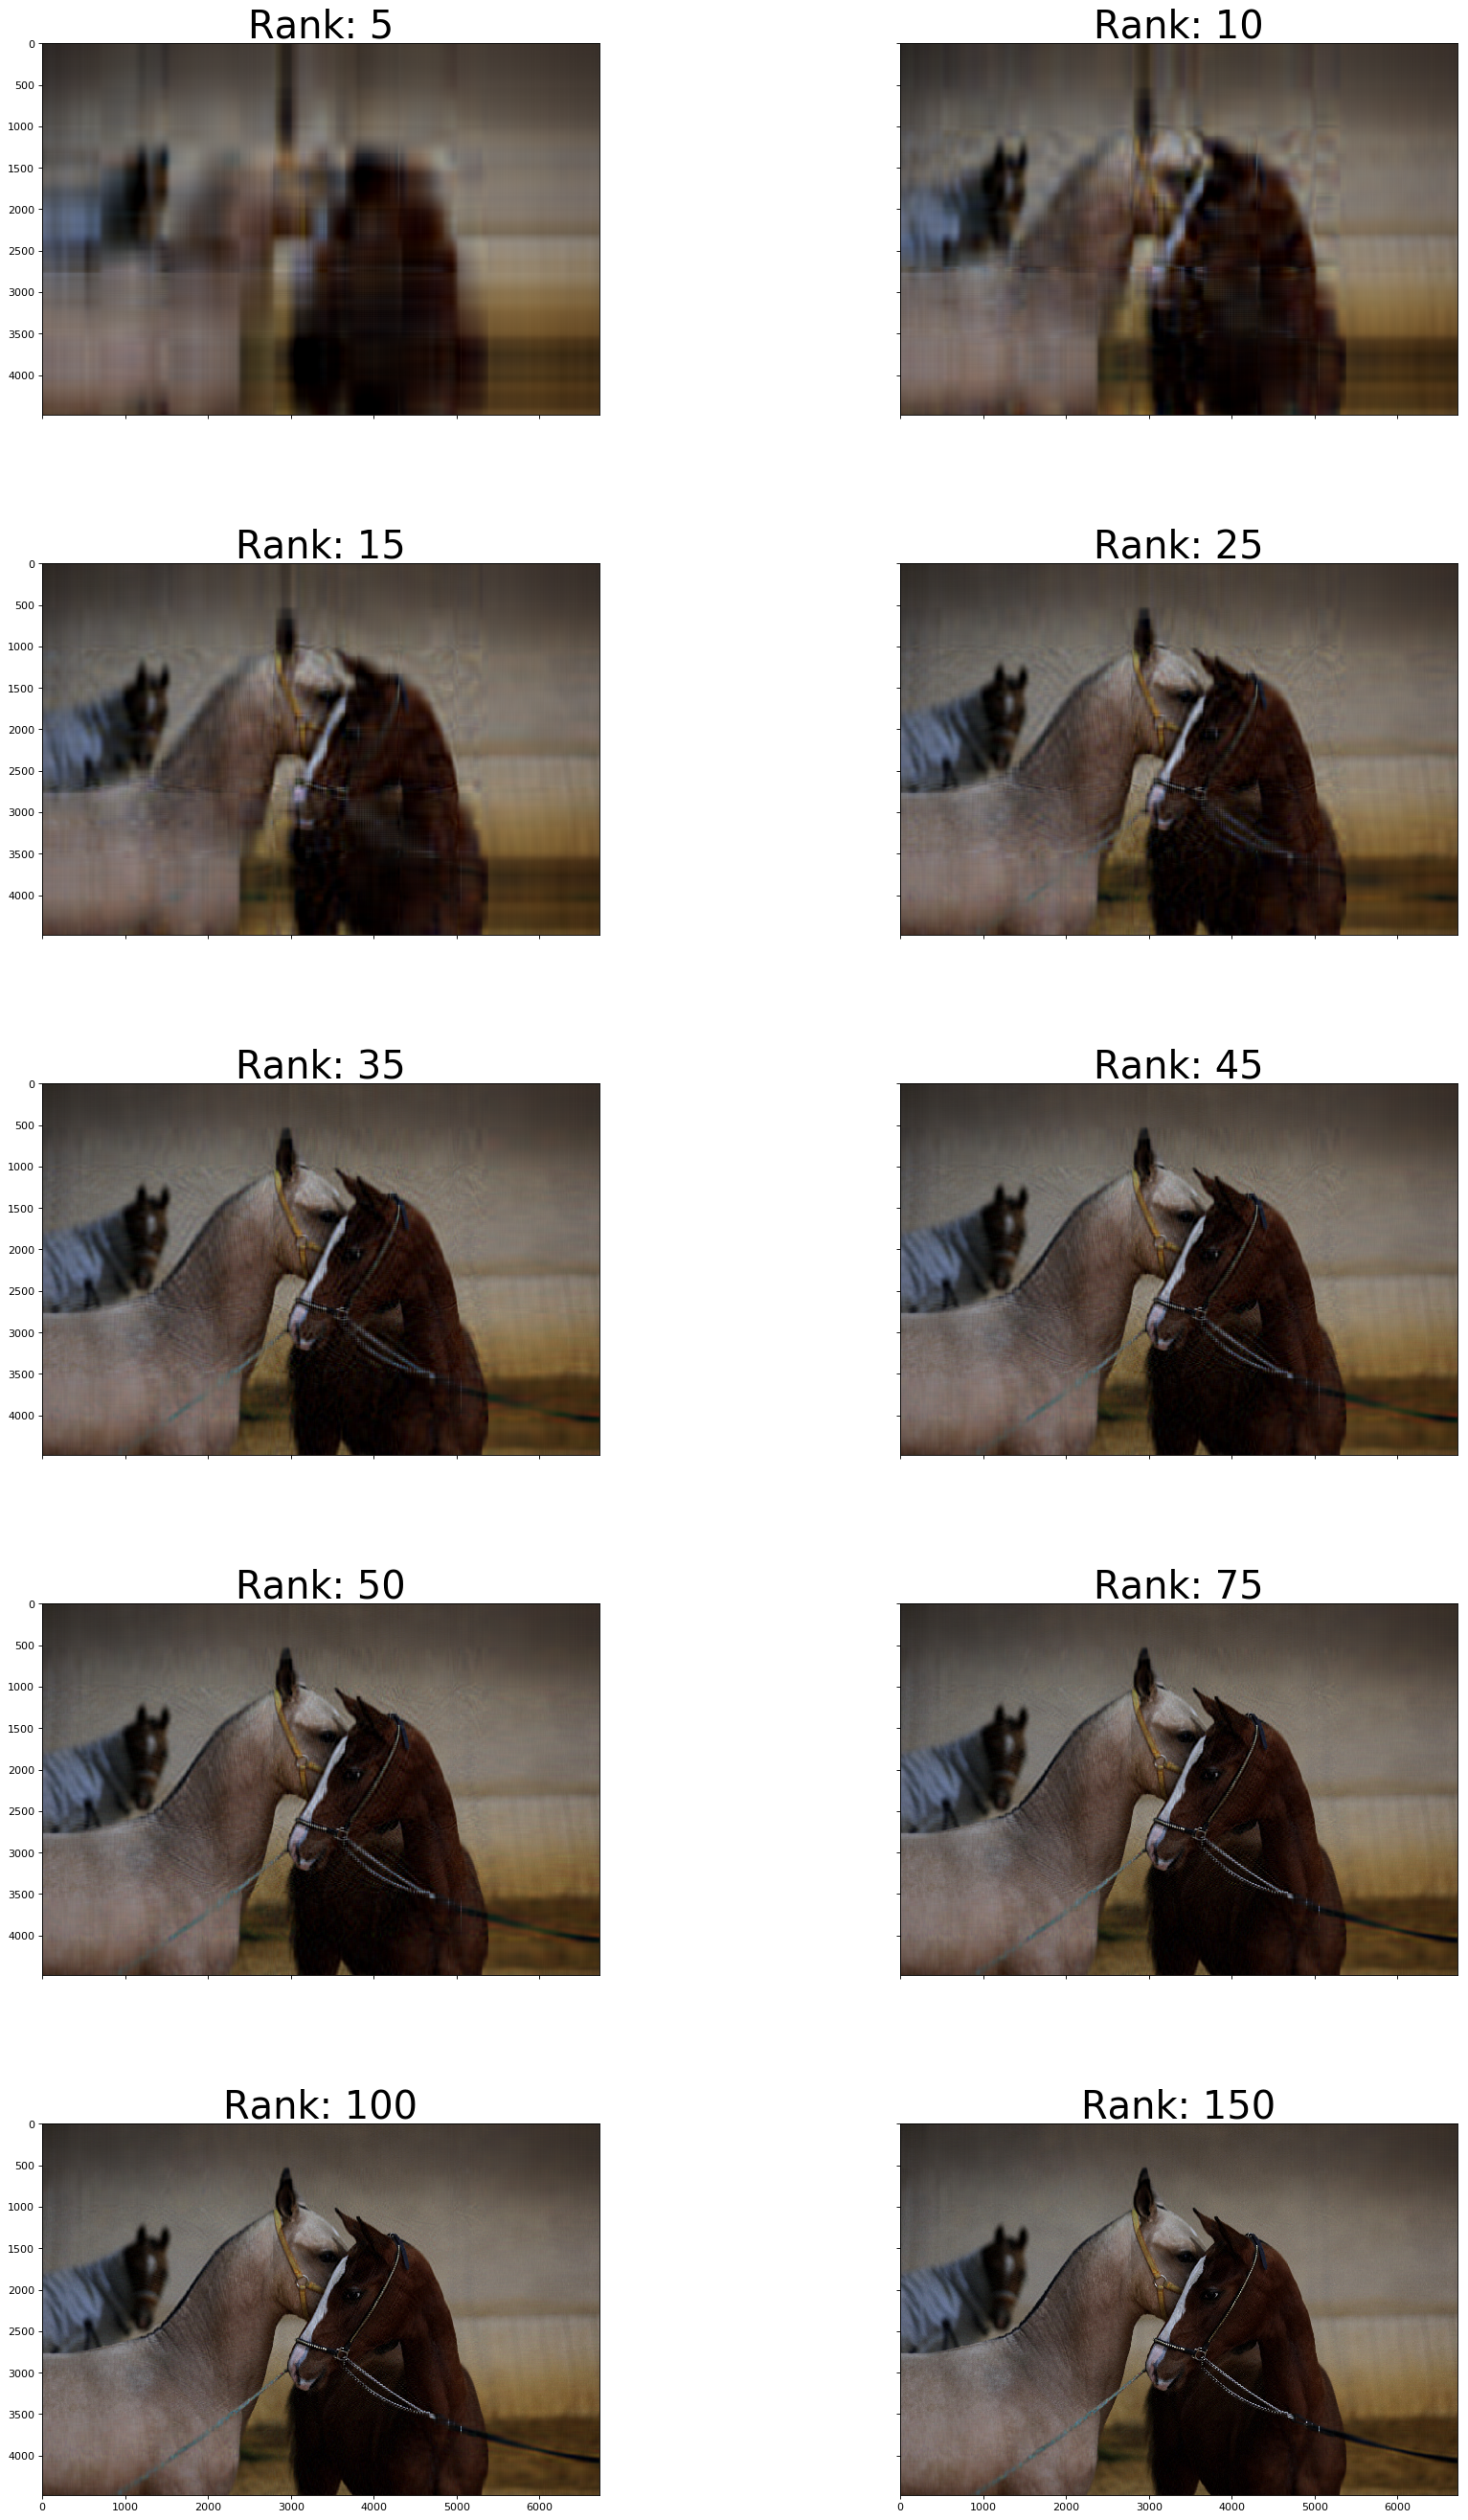

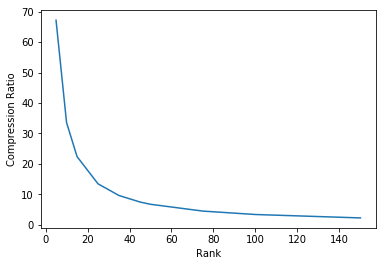

In [12]:
# Try different k values to see what kind of compression and quality of image is seen

CR3 = []
kvalues = [5,10, 15, 25, 35, 45, 50, 75, 100,150]

i = 0
figsize = width / float(dpi), height / float(dpi)
nrows, ncols = 5, 2  # array of sub-plots based on number of kvalues

fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(64,64), dpi=80, sharex=True, sharey=True)
fig.subplots_adjust(left=0.35, bottom=0.25, right=0.65, top=0.75, wspace=0.4, hspace=0.4)

for k in kvalues:
    Recon_r = np.matrix(U_r[:, 0:k]) * np.diag(s_r[0:k]) * np.matrix(Vt_r[0:k, :])
    Recon_g = np.matrix(U_g[:, 0:k]) * np.diag(s_g[0:k]) * np.matrix(Vt_g[0:k, :])
    Recon_b = np.matrix(U_b[:, 0:k]) * np.diag(s_b[0:k]) * np.matrix(Vt_b[0:k, :])
    
    ratio =   CalculateCompressionRatio_color(k)
    CR3.append(ratio)
    print("Color Compression Ratio:",ratio, " k = ",k)
    
    Recon_Full = np.zeros((row, col, 3))
  
    Recon_Full[:, :,  0] = Recon_r
    Recon_Full[:, :,  1] = Recon_g
    Recon_Full[:, :,  2] = Recon_b
    Recon_Full[Recon_Full < 0] = 0
    Recon_Full[Recon_Full > 1] = 1
    
    # Plotting
    #Plotting
    fig.axes[i].set_title("Rank: " + str(k), size=36 )
    fig.axes[i].imshow(Recon_Full)
    i += 1

# Display all the images
plt.show()
    
 # Plot Compression ratio obtined for greyscale images for various values of k    
plt.figure()
plt.plot(kvalues,CR3)
plt.title("")
plt.xlabel('Rank')
plt.ylabel('Compression Ratio')
plt.show()   

In conclusion, application of SVD gives us some good compression results especially with Greyscale as we can see from the plots.

The degree to which we need the compression will vary with the value of k. However, to achieve high compression ratio the image quality will surely suffer. So a choice will have to be made to pick the value of k based on an acceptable image quality for a desired comppression ratio. 

Here, for Greyscale, a k value of 20 would have sufficed to get a good commpression(137%) and with image quality that is not degraded. With color images, in our example a k = 2 got a 13% compression. In general a selected k value can typically be be reused in the same application. 


In [13]:
# The End